# BP Classification (ring)

[TensorFlow](https://www.tensorflow.org/) the library used for BP.

[Keras](https://keras.io/) is a library that provides a Python interface for artificial neural networks. Keras interface for TensorFlow library.

BP on the ring data requires two or three hidden layers  to achieve good predictions.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold
import tensorflow as tf
import tensorflow.keras as kr
from IPython.core.display import display, HTML
%matplotlib inline
from google.colab import files
uploaded = files.upload()

In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "A2-ring-separable.txt" with length 220021 bytes
User uploaded file "A2-ring-test.txt" with length 220003 bytes


In [ ]:
filename1 = 'input/A2-ring/A2-ring-separable.txt'
ring_separable_data = np.loadtxt(filename1, delimiter='\t', dtype={'names': ('x', 'y', 'C'), 'formats': ('f4', 'f4', 'i4')})

train_df = pd.DataFrame(ring_separable_data)
print(train_df)

filename2 = 'input/A2-ring/A2-ring-test.txt'
ring_test_data = np.loadtxt(filename2, delimiter='\t', dtype={'names': ('x', 'y', 'C'), 'formats': ('f4', 'f4', 'i4')})

test_df = pd.DataFrame(ring_test_data)
print(test_df)

             x         y  C
0    -0.137094  0.899654  0
1     0.542574 -0.492435  1
2    -0.658204  0.605110  0
3    -0.869820  0.519287  0
4     0.678610  0.346579  1
...        ...       ... ..
9995  0.419610 -0.482939  1
9996 -0.456348  0.910800  0
9997 -0.003036 -0.295153  1
9998  0.765332  0.798063  0
9999 -0.532259 -0.302748  1

[10000 rows x 3 columns]
             x         y  C
0     0.512196  0.112623  1
1     0.610173 -0.387091  1
2     0.927970  0.245895  0
3     0.159933  0.111516  0
4    -0.451556  0.877259  0
...        ...       ... ..
9995  0.958078 -0.422827  0
9996  0.544659 -0.590963  0
9997 -0.684583  0.916596  0
9998  0.906773  0.274620  0
9999 -0.544859  0.132948  1

[10000 rows x 3 columns]


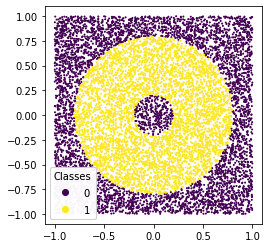

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
scatter = ax.scatter(train_df.iloc[:,0], train_df.iloc[:,1], c=train_df.iloc[:,2], s=1)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax.add_artist(legend1)
plt.show()

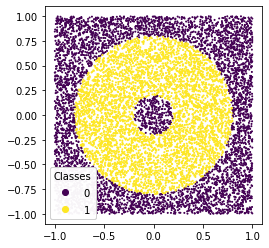

In [ ]:
fig, ax2 = plt.subplots()
ax2.set_aspect('equal', 'box')
scatter2 = ax2.scatter(test_df.iloc[:,0], test_df.iloc[:,1], c=test_df.iloc[:,2], s=1)
legend2 = ax2.legend(*scatter2.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax2.add_artist(legend2)
plt.show()

In [ ]:
res = 100 

_x0 = np.linspace(-1.0, 1.0, res)
_x1 = np.linspace(-1.0, 1.0, res)

_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

_pY = np.zeros((res, res)) + 0.5

X_train = train_df[['x', 'y']].to_numpy()
y_train = train_df['C'].to_numpy()

X=X_train
Y=y_train

## Tenserflow

Step 0 / 200000 - Loss =  0.3972247 - Acc = 0.4867
Step 1000 / 200000 - Loss =  0.38383815 - Acc = 0.5208
Step 2000 / 200000 - Loss =  0.37740827 - Acc = 0.541
Step 3000 / 200000 - Loss =  0.37252045 - Acc = 0.5556
Step 4000 / 200000 - Loss =  0.36821842 - Acc = 0.5642
Step 5000 / 200000 - Loss =  0.36454526 - Acc = 0.5744
Step 6000 / 200000 - Loss =  0.36124167 - Acc = 0.5797
Step 7000 / 200000 - Loss =  0.35815856 - Acc = 0.5829
Step 8000 / 200000 - Loss =  0.3550723 - Acc = 0.5865
Step 9000 / 200000 - Loss =  0.3518445 - Acc = 0.5901
Step 10000 / 200000 - Loss =  0.34823784 - Acc = 0.5925
Step 11000 / 200000 - Loss =  0.34391814 - Acc = 0.5937
Step 12000 / 200000 - Loss =  0.3383605 - Acc = 0.5962
Step 13000 / 200000 - Loss =  0.33052194 - Acc = 0.5955
Step 14000 / 200000 - Loss =  0.31822526 - Acc = 0.5931
Step 15000 / 200000 - Loss =  0.29763597 - Acc = 0.5916
Step 16000 / 200000 - Loss =  0.2670038 - Acc = 0.6382
Step 17000 / 200000 - Loss =  0.23117141 - Acc = 0.6872
Step 18000 

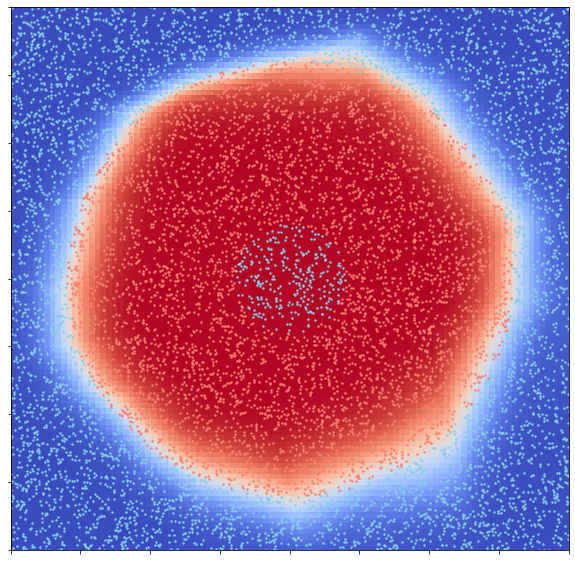

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML

iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.0005     
nn = [2, 16, 8, 1] 

W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


loss = tf.losses.mean_squared_error(pY, iY)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

n_steps = 200000 

iPY = [] 

with tf.Session() as sess:
  
  sess.run(tf.global_variables_initializer())
    
  for step in range(n_steps):
  
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    
    if step % 1000 == 0: 
      
      acc = np.mean(np.round(_pY) == Y)
      
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      iPY.append(_pY)
      
  

ims = []

fig = plt.figure(figsize=(10, 10))


for fr in range(len(iPY)):
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue", s=2)
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon", s=2)

  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())

## Keras

------------------------------------------------------------------------
Training for fold 1 ...
Train on 7500 samples
Epoch 1/200
7500/7500 [==============================] - 1s 71us/sample - loss: 0.2359 - acc: 0.6115
Epoch 2/200
7500/7500 [==============================] - 0s 60us/sample - loss: 0.2067 - acc: 0.7844
Epoch 3/200
7500/7500 [==============================] - 0s 50us/sample - loss: 0.1720 - acc: 0.8621
Epoch 4/200
7500/7500 [==============================] - 0s 58us/sample - loss: 0.1402 - acc: 0.8949
Epoch 5/200
7500/7500 [==============================] - 0s 51us/sample - loss: 0.1163 - acc: 0.9132
Epoch 6/200
7500/7500 [==============================] - 0s 57us/sample - loss: 0.1000 - acc: 0.9243
Epoch 7/200
7500/7500 [==============================] - 0s 59us/sample - loss: 0.0888 - acc: 0.9332
Epoch 8/200
7500/7500 [==============================] - 0s 53us/sample - loss: 0.0808 - acc: 0.9376
Epoch 9/200
7500/7500 [==============================] - 0s 51us/sample -

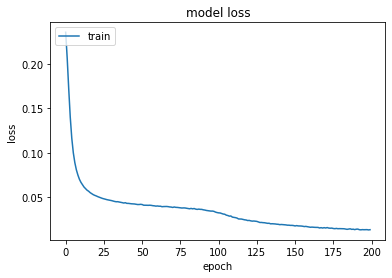

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


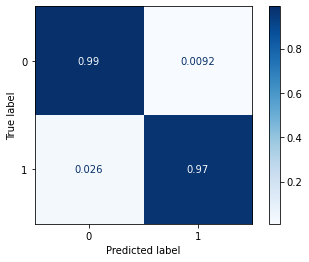

Confusion matrix:
 [[1288   12]
 [  31 1169]]
Percentage classification error obtained from validation set: 1.72%
------------------------------------------------------------------------
Training for fold 2 ...
Train on 7500 samples
Epoch 1/200
7500/7500 [==============================] - 0s 38us/sample - loss: 0.2395 - acc: 0.5295
Epoch 2/200
7500/7500 [==============================] - 0s 32us/sample - loss: 0.2270 - acc: 0.6183
Epoch 3/200
7500/7500 [==============================] - 0s 35us/sample - loss: 0.2072 - acc: 0.7259
Epoch 4/200
7500/7500 [==============================] - 0s 33us/sample - loss: 0.1832 - acc: 0.7977
Epoch 5/200
7500/7500 [==============================] - 0s 33us/sample - loss: 0.1546 - acc: 0.8589
Epoch 6/200
7500/7500 [==============================] - 0s 33us/sample - loss: 0.1273 - acc: 0.9012
Epoch 7/200
7500/7500 [==============================] - 0s 33us/sample - loss: 0.1080 - acc: 0.9255
Epoch 8/200
7500/7500 [==============================] - 0s 

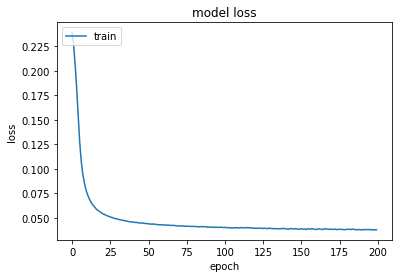

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


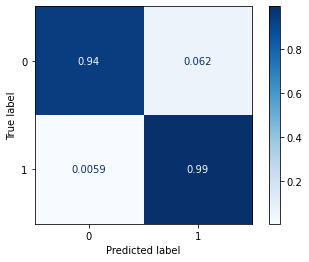

Confusion matrix:
 [[1233   82]
 [   7 1178]]
Percentage classification error obtained from validation set: 3.56%
------------------------------------------------------------------------
Training for fold 3 ...
Train on 7500 samples
Epoch 1/200
7500/7500 [==============================] - 0s 39us/sample - loss: 0.2456 - acc: 0.5047
Epoch 2/200
7500/7500 [==============================] - 0s 34us/sample - loss: 0.2346 - acc: 0.5613
Epoch 3/200
7500/7500 [==============================] - 0s 34us/sample - loss: 0.2244 - acc: 0.6213
Epoch 4/200
7500/7500 [==============================] - 0s 35us/sample - loss: 0.2122 - acc: 0.6639
Epoch 5/200
7500/7500 [==============================] - 0s 34us/sample - loss: 0.1992 - acc: 0.7084
Epoch 6/200
7500/7500 [==============================] - 0s 35us/sample - loss: 0.1875 - acc: 0.7379
Epoch 7/200
7500/7500 [==============================] - 0s 40us/sample - loss: 0.1783 - acc: 0.7516
Epoch 8/200
7500/7500 [==============================] - 0s 

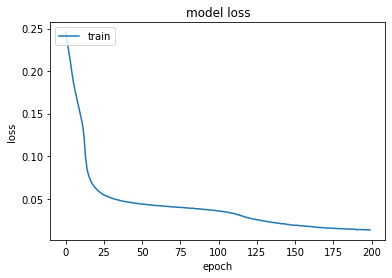

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


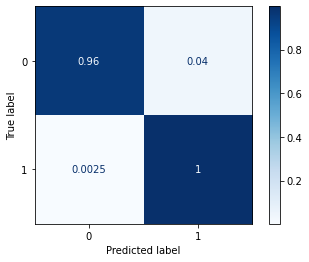

Confusion matrix:
 [[1264   53]
 [   3 1180]]
Percentage classification error obtained from validation set: 2.2399999999999998%
------------------------------------------------------------------------
Training for fold 4 ...
Train on 7500 samples
Epoch 1/200
7500/7500 [==============================] - 0s 42us/sample - loss: 0.2417 - acc: 0.5123
Epoch 2/200
7500/7500 [==============================] - 0s 34us/sample - loss: 0.2203 - acc: 0.6671
Epoch 3/200
7500/7500 [==============================] - 0s 35us/sample - loss: 0.1924 - acc: 0.7905
Epoch 4/200
7500/7500 [==============================] - 0s 38us/sample - loss: 0.1607 - acc: 0.8569
Epoch 5/200
7500/7500 [==============================] - 0s 37us/sample - loss: 0.1332 - acc: 0.8975
Epoch 6/200
7500/7500 [==============================] - 0s 36us/sample - loss: 0.1130 - acc: 0.9175
Epoch 7/200
7500/7500 [==============================] - 0s 34us/sample - loss: 0.0992 - acc: 0.9245
Epoch 8/200
7500/7500 [=======================

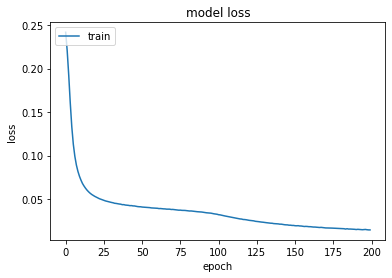

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


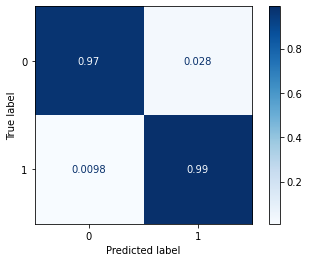

Confusion matrix:
 [[1235   36]
 [  12 1217]]
Percentage classification error obtained from validation set: 1.92%

Results of cross validation:
------------------------------------------------------------------------
Percentage classification error obtained from validation set per fold
------------------------------------------------------------------------
> Fold 1 - 1.72%
------------------------------------------------------------------------
> Fold 2 - 3.56%
------------------------------------------------------------------------
> Fold 3 - 2.2399999999999998%
------------------------------------------------------------------------
> Fold 4 - 1.92%
------------------------------------------------------------------------
Mean percentage classification error obtained from cross validation:
> 2.36% (+- 0.7172168430816442)
------------------------------------------------------------------------


In [ ]:
X_train = train_df[['x', 'y']].to_numpy()
y_train = train_df['C'].to_numpy()

learning_rate = 0.05  
momentum = 0.1       
nn = [2, 16, 8, 1]    

fold_no = 1

cv_percentage_classification_errors = list()

# 4-fold cross-validation
kf = KFold(n_splits=4)
for train, validation in kf.split(X_train):
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
  

    model = kr.Sequential()

    l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

    l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

    l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

    model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=learning_rate, momentum=momentum), metrics=['acc'])

    history = model.fit(X_train[train], y_train[train], epochs=200)

    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

    y_pred = model.predict(X_train[validation])

    threshold = 0.5
    y_pred = np.where(y_pred > threshold, 1,0)

    disp = ConfusionMatrixDisplay.from_predictions(y_train[validation], y_pred,
                                                    cmap=plt.cm.Blues,
                                                    normalize='true')
    plt.show()

    cm = confusion_matrix(y_train[validation], y_pred)
    print('Confusion matrix:\n', cm)

    percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
    print(f'Percentage classification error obtained from validation set: {percentage_classification_error}%')
    
    cv_percentage_classification_errors.append(percentage_classification_error)

    fold_no = fold_no + 1

for i in range(0, len(cv_percentage_classification_errors)):  print(f'> Fold {i+1} - {cv_percentage_classification_errors[i]}%')
print(f'> {np.mean(cv_percentage_classification_errors)}% (+- {np.std(cv_percentage_classification_errors)})')


## Keras - training

Train on 10000 samples
Epoch 1/200
10000/10000 [==============================] - 1s 58us/sample - loss: 0.2493 - acc: 0.4922
Epoch 2/200
10000/10000 [==============================] - 1s 50us/sample - loss: 0.2409 - acc: 0.5240
Epoch 3/200
10000/10000 [==============================] - 1s 51us/sample - loss: 0.2279 - acc: 0.6479
Epoch 4/200
10000/10000 [==============================] - 1s 64us/sample - loss: 0.1994 - acc: 0.7986
Epoch 5/200
10000/10000 [==============================] - 0s 50us/sample - loss: 0.1583 - acc: 0.8679
Epoch 6/200
10000/10000 [==============================] - 0s 49us/sample - loss: 0.1246 - acc: 0.9041
Epoch 7/200
10000/10000 [==============================] - 1s 53us/sample - loss: 0.1034 - acc: 0.9218
Epoch 8/200
10000/10000 [==============================] - 1s 52us/sample - loss: 0.0903 - acc: 0.9326
Epoch 9/200
10000/10000 [==============================] - 0s 35us/sample - loss: 0.0815 - acc: 0.9386
Epoch 10/200
10000/10000 [========================

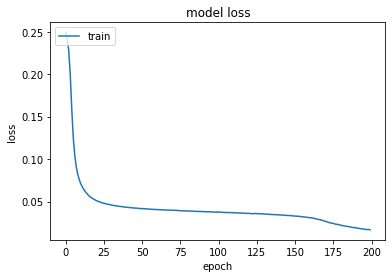

In [ ]:
learning_rate = 0.05  
momentum = 0.1       
nn = [2, 16, 8, 1]    

model = kr.Sequential()

l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=learning_rate, momentum=momentum), metrics=['acc'])

history = model.fit(X_train, y_train, epochs=200)

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Keras - test

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


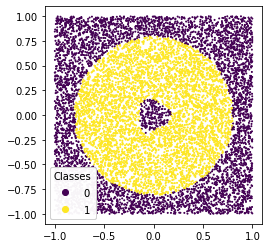

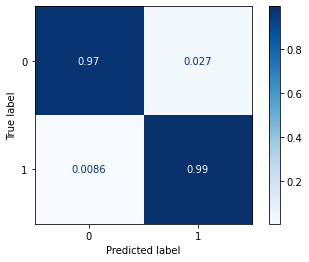

Confusion matrix:
 [[5188  145]
 [  40 4627]]
Percentage classification error obtained from test set: 1.8499999999999999%


In [ ]:
X_test = test_df[['x', 'y']].to_numpy()
y_test = test_df['C'].to_numpy()

y_pred = model.predict(X_test)

threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)


fig, ax3 = plt.subplots()
ax3.set_aspect('equal', 'box')
scatter3 = ax3.scatter(X_test[:,0], X_test[:,1], c=y_pred[:], s=1)
legend3 = ax3.legend(*scatter3.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax3.add_artist(legend3)
plt.show()


disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
																								cmap=plt.cm.Blues,
																								normalize='true')
plt.show()

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
print(f'Percentage classification error obtained from test set: {percentage_classification_error}%')